# Market Price Clustering

In [ ]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Market Price data

price = pd.read_csv('Filtered Demand_Final.csv')
price

,Timestamp,SCOTLAND_DEMAND,Moray_Local_Demand,Market_Price_GBP
0,2023-09-01 00:00:00,1852.0,39.6328,82.86
1,2023-09-01 01:00:00,1785.0,38.1990,79.92
2,2023-09-01 02:00:00,1737.0,37.1718,77.37
3,2023-09-01 03:00:00,1720.5,36.8187,75.69
4,2023-09-01 04:00:00,1700.0,36.3800,76.85
...,...,...,...,...
8779,2024-08-31 19:00:00,2070.0,44.2980,105.06
8780,2024-08-31 20:00:00,2053.5,43.9449,92.21
8781,2024-08-31 21:00:00,1905.5,40.7777,83.31
8782,2024-08-31 22:00:00,1704.5,36.4763,72.37


In [ ]:
# checking the general info of the dataset

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           8784 non-null   object 
 1   SCOTLAND_DEMAND     8784 non-null   float64
 2   Moray_Local_Demand  8784 non-null   float64
 3   Market_Price_GBP    8784 non-null   float64
dtypes: float64(3), object(1)
memory usage: 274.6+ KB


In [ ]:
# convert the TimeStamp time to datetime format in pandas

price["Timestamp"] = pd.to_datetime(price["Timestamp"], errors="coerce")

# check if there is any null value
price["Timestamp"].isna().sum()

np.int64(0)

In [ ]:
# Extracts the hour component from the Timestamp column and stores it as a new column named Hour.
price['Hour'] = price['Timestamp'].dt.hour

In [ ]:
price.head()

,Timestamp,SCOTLAND_DEMAND,Moray_Local_Demand,Market_Price_GBP,Hour
0,2023-09-01 00:00:00,1852.0,39.6328,82.86,0
1,2023-09-01 01:00:00,1785.0,38.1990,79.92,1
2,2023-09-01 02:00:00,1737.0,37.1718,77.37,2
3,2023-09-01 03:00:00,1720.5,36.8187,75.69,3
4,2023-09-01 04:00:00,1700.0,36.3800,76.85,4


In [ ]:
# select market price feature and check if there is any null values
features = ["Market_Price_GBP"]

X_price = price[features].copy()
X_price.isna().sum()

Market_Price_GBP    0
dtype: int64

In [ ]:
# standardising the feature

scaler = StandardScaler()
X_scaled_price = scaler.fit_transform(X_price)

In [ ]:
X_scaled_price

array([[0.4271214 ],
       [0.32174821],
       [0.23035309],
       ...,
       [0.44324995],
       [0.05114698],
       [0.03215113]])

In [ ]:
# silhouette analysis for market price feature to identify appropriate K value

scores_price = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled_price)
    scores_price[k] = silhouette_score(X_scaled_price, labels)

scores_price

{2: np.float64(0.5530294018292355),
 3: np.float64(0.5447715933646973),
 4: np.float64(0.5308561844152314),
 5: np.float64(0.5331469181406213),
 6: np.float64(0.5296741830587066),
 7: np.float64(0.5323073019547223),
 8: np.float64(0.5222370339513862)}

In [ ]:
# elbow method to ensure the K value chosen is the optimum one

inertias_price = []
K = range(1, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled_price)
    inertias_price.append(km.inertia_)

inertias_price

[8783.999999999996,
 4059.328188084194,
 2022.9651821770963,
 1249.640267244452,
 846.6467881943732,
 609.4667636101238,
 452.928462580478,
 357.3795896664675]

## Plot silhoutte score

In [ ]:
# standardising the feature

X = price[["Market_Price_GBP"]].to_numpy()
X_scaled_price = StandardScaler().fit_transform(X)

In [ ]:
# Make a function for plotting silhouette score analysis

def plot_silhouette_1d(X, k, save_path=None, random_state=42, n_init="auto", jitter=0.03):
    # pastiin shape (n,1)
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    km = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
    labels = km.fit_predict(X)

    sil_avg = silhouette_score(X, labels)
    sil_vals = silhouette_samples(X, labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
    fig.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {k}", fontsize=12)

    # --- left: silhouette
    ax1.set_title("The silhouette plot for the various clusters.", fontsize=10)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1.0])

    y_lower = 10
    for i in range(k):
        ith = sil_vals[labels == i]
        ith.sort()
        size_i = ith.shape[0]
        y_upper = y_lower + size_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith,
                          facecolor=color, edgecolor=color, alpha=0.9)
        ax1.text(-0.05, y_lower + 0.5 * size_i, str(i), fontsize=10)

        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--", linewidth=1.2)
    ax1.set_yticks([])

    # --- right: 1D scatter + jitter
    ax2.set_title("The visualization of the clustered data (1D).", fontsize=10)
    y = np.random.normal(0, jitter, size=len(X))
    colors = plt.cm.nipy_spectral(labels.astype(float) / k)

    ax2.scatter(X[:, 0], y, c=colors, s=25, alpha=0.6, marker=".", linewidths=0)
    centers = km.cluster_centers_.ravel()
    ax2.scatter(centers, np.zeros_like(centers), marker="o", c="white", s=180,
                edgecolor="k", linewidth=1)
    for i, c in enumerate(centers):
        ax2.scatter(c, 0, marker=f"${i}$", s=60, c="k")

    ax2.set_xlabel("Price (scaled)")
    ax2.set_yticks([])
    ax2.grid(alpha=0.2)

    plt.tight_layout()
    if save_path is not None:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

    return sil_avg

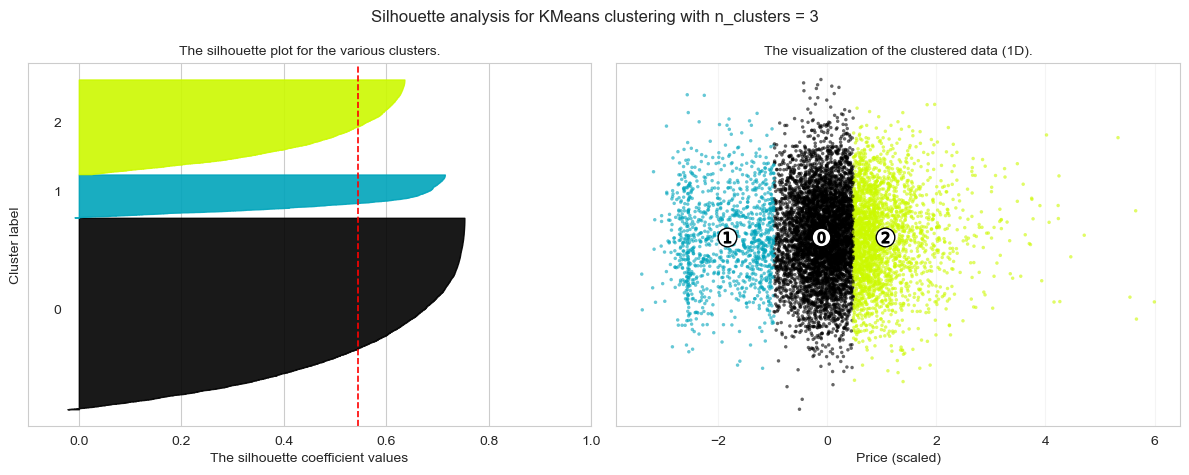

np.float64(0.5447715933646973)

In [ ]:
# plotting the silhoutte score for price woth K=3

plot_silhouette_1d(X_scaled_price, k=3, save_path="silhouette_price_k3.png")

In [ ]:
# plotting the silhoutte score for demand with K=4

X = price[["Moray_Local_Demand"]].to_numpy()
X_scaled_demand = StandardScaler().fit_transform(X)

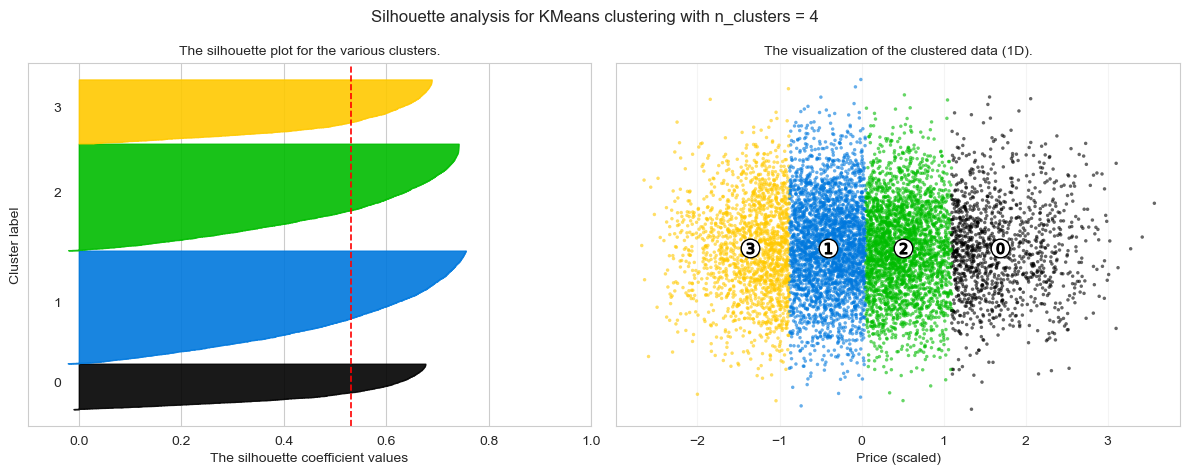

np.float64(0.5301110368992257)

In [ ]:
plot_silhouette_1d(X_scaled_demand, k=4, save_path="silhouette_demand_k4.png")

In [ ]:
# silhoutte analysis for demand feature

scores_price = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled_demand)
    scores_price[k] = silhouette_score(X_scaled_demand, labels)

scores_price

{2: np.float64(0.5565570814937464),
 3: np.float64(0.5342312814278085),
 4: np.float64(0.5301110368992257),
 5: np.float64(0.521143598800921),
 6: np.float64(0.5218038040806265),
 7: np.float64(0.5264009503572227),
 8: np.float64(0.5191635558786024)}

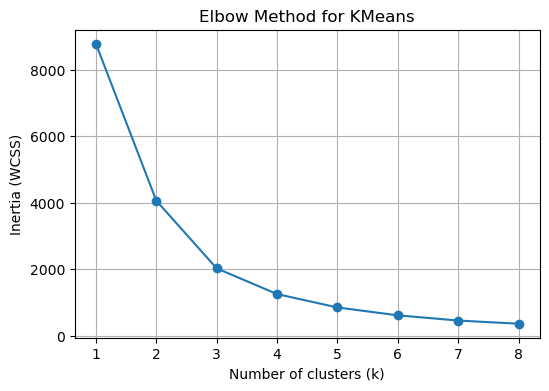

In [ ]:
# WCSS plot for the elbow method to determine the K value of price cluster

plt.figure(figsize=(6,4))
plt.plot(K, inertias_price, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for KMeans")
plt.grid(True)
plt.show()

/var/folders/_j/r_89yc7x1t75cq57frl6chnm0000gn/T/ipykernel_24532/3763006691.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


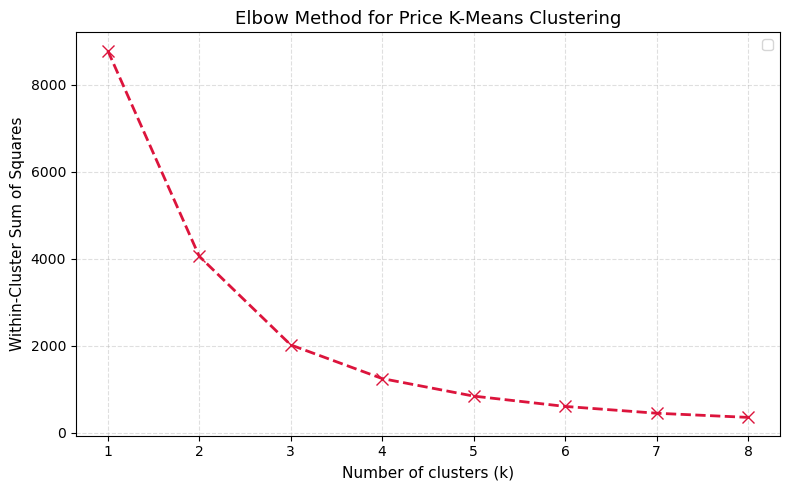

In [ ]:
# refining the plot with different style

plt.figure(figsize=(8,5))

plt.plot(
    K,
    inertias_price,
    marker="x",
    linestyle="--",
    color="crimson",
    linewidth=2,
    markersize=8,
)

plt.xlabel("Number of clusters (k)", fontsize=11)
plt.ylabel("Within-Cluster Sum of Squares", fontsize=11)
plt.title("Elbow Method for Price K-Means Clustering", fontsize=13)

plt.xticks(K)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# K-means clustering for the price and save the cluster label to the dataframe

k = 3
kmeans_price = KMeans(n_clusters=k, random_state=42, n_init="auto")
price["cluster"] = kmeans_price.fit_predict(X_scaled_price)

price[["Timestamp","cluster"]].head()

,Timestamp,cluster
0,2023-09-01 00:00:00,0
1,2023-09-01 01:00:00,0
2,2023-09-01 02:00:00,0
3,2023-09-01 03:00:00,0
4,2023-09-01 04:00:00,0


In [ ]:
#counting value per cluster

price["cluster"].value_counts().sort_index()

cluster
0    5112
1    1145
2    2527
Name: count, dtype: int64

In [ ]:
# calculating the mean of the price for each cluster

cluster_profile_price = price.groupby("cluster")[features].mean()
cluster_profile_price

,Market_Price_GBP
cluster,
0,67.856688
1,19.620463
2,100.440882


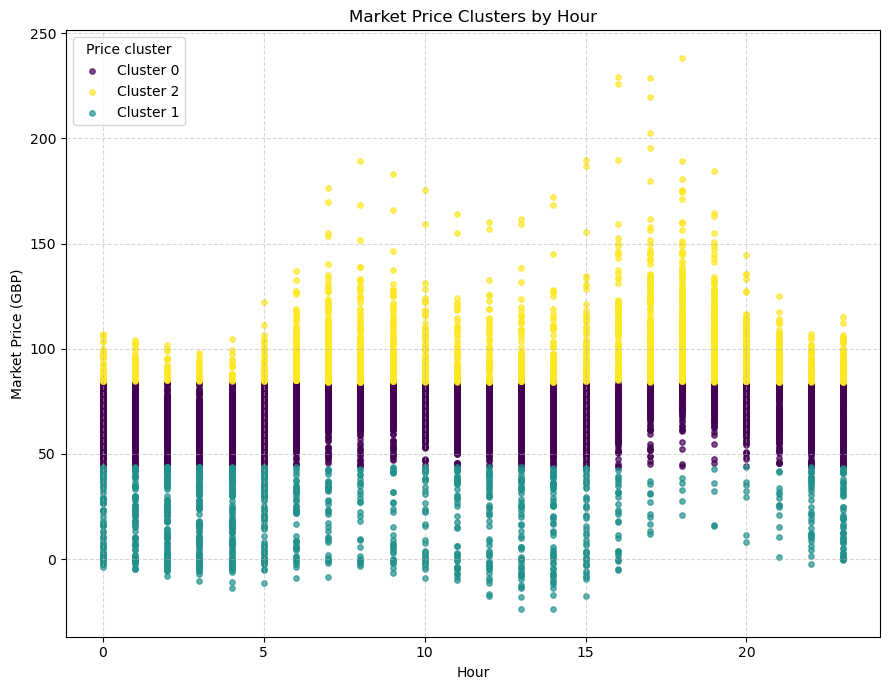

In [ ]:
# plotting the clustering result for market price

plt.figure(figsize=(9,7))

clusters = price["cluster"].unique()
cmap = plt.cm.viridis

for c in clusters:
    subset = price[price["cluster"] == c]
    plt.scatter(
        subset["Hour"],
        subset["Market_Price_GBP"],
        s=15,
        alpha=0.7,
        label=f"Cluster {c}",
        color=cmap(c / (clusters.max()))
    )

plt.xlabel("Hour")
plt.ylabel("Market Price (GBP)")
plt.title("Market Price Clusters by Hour")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(
    title="Price cluster",
    loc="upper left",
    frameon=True,      # kotak legend
    fontsize=10
)
plt.tight_layout()
plt.show()

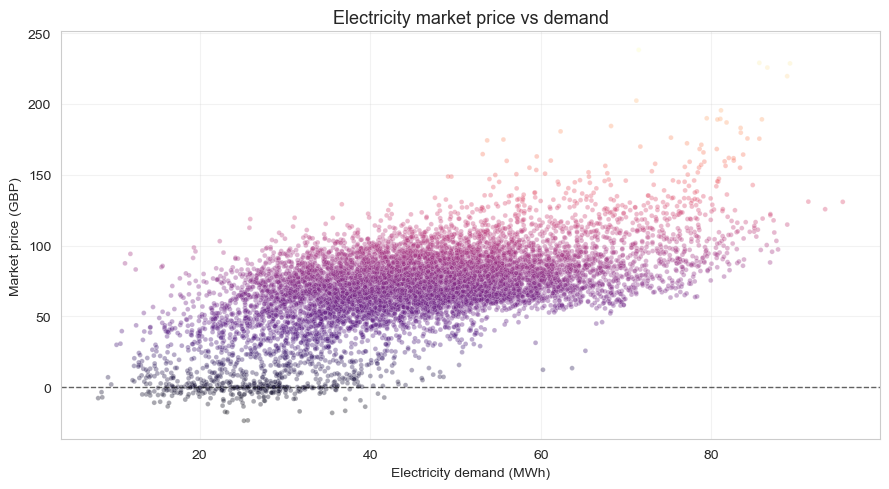

In [ ]:
# demand vs market price scatter plot

plt.figure(figsize=(9,5))

sns.scatterplot(
    data=price,
    x="Moray_Local_Demand",
    y="Market_Price_GBP",
    hue="Market_Price_GBP",
    palette="magma",
    alpha=0.35,
    s=12,
    legend=False
)

plt.axhline(0, linestyle="--", linewidth=1, color="black", alpha=0.6)

plt.title("Electricity market price vs demand", fontsize=13)
plt.xlabel("Electricity demand (MWh)")
plt.ylabel("Market price (GBP)")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

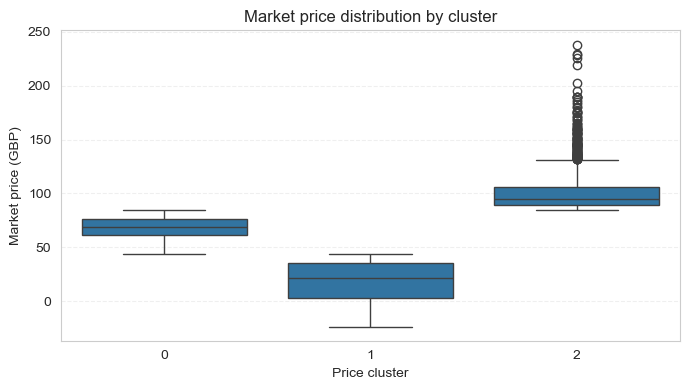

In [ ]:
# market price boxplot for each cluster

plt.figure(figsize=(7,4))

sns.boxplot(
    data=price,
    x="cluster",
    y="Market_Price_GBP"
)

plt.xlabel("Price cluster")
plt.ylabel("Market price (GBP)")
plt.title("Market price distribution by cluster")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

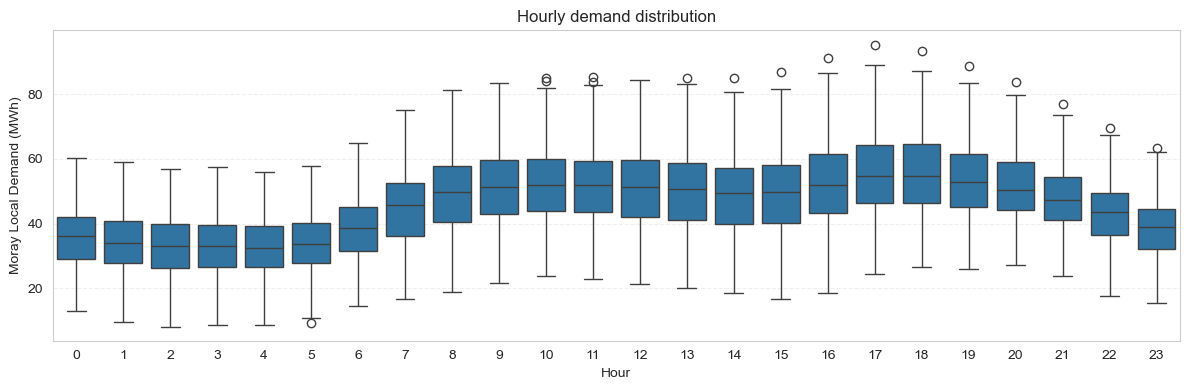

In [ ]:
# demand boxplot per hour for price

plt.figure(figsize=(12,4))

sns.boxplot(
    data=price,
    x="Hour",
    y="Moray_Local_Demand"
)

plt.xlabel("Hour")
plt.ylabel("Moray Local Demand (MWh)")
plt.title("Hourly demand distribution")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

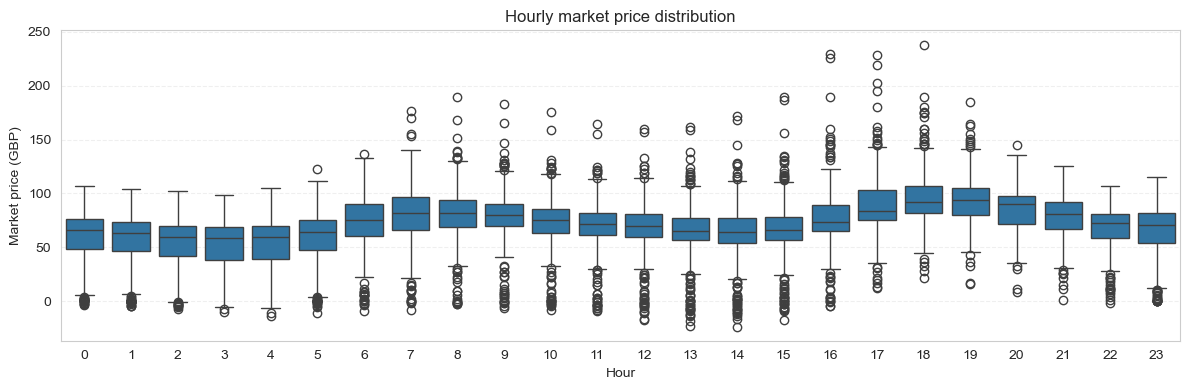

In [ ]:
# price boxplot per hour for price

plt.figure(figsize=(12,4))

sns.boxplot(
    data=price,
    x="Hour",
    y="Market_Price_GBP"
)

plt.xlabel("Hour")
plt.ylabel("Market price (GBP)")
plt.title("Hourly market price distribution")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# checking the first 5 rows of the dataframe

price.head()

,Timestamp,SCOTLAND_DEMAND,Moray_Local_Demand,Market_Price_GBP,Hour,cluster
0,2023-09-01 00:00:00,1852.0,39.6328,82.86,0,0
1,2023-09-01 01:00:00,1785.0,38.1990,79.92,1,0
2,2023-09-01 02:00:00,1737.0,37.1718,77.37,2,0
3,2023-09-01 03:00:00,1720.5,36.8187,75.69,3,0
4,2023-09-01 04:00:00,1700.0,36.3800,76.85,4,0


In [ ]:
# calculate mean, max, min of the price

price_cluster_stats = (
    price
    .groupby("cluster")["Market_Price_GBP"]
    .agg(
        min_price="min",
        mean_price="mean",
        max_price="max"
    )
    .round(2)
)

price_cluster_stats

,min_price,mean_price,max_price
cluster,,,
0,43.86,67.86,84.33
1,-23.77,19.62,43.83
2,84.35,100.44,238.21


In [ ]:
#Finding the total hours and percentage of the demand clusters throughout the study period

summary_demand = price['cluster'].value_counts().to_frame('Total Hours')
summary_demand['Percentage (%)'] = (summary_demand['Total Hours']/len(price)*100).round(2)

print(summary_demand.sort_index())

         Total Hours  Percentage (%)
cluster                             
0               5112           58.20
1               1145           13.04
2               2527           28.77


In [ ]:
# checking the first 5 rows of the dataframe

price.head()

,Timestamp,SCOTLAND_DEMAND,Moray_Local_Demand,Market_Price_GBP,Hour,Demand_Cluster,Class,Days,Month,Day of The Week,cluster,month,season
0,2023-09-01 00:00:00+00:00,1852.0,39.6328,82.86,0,3,0,4,9,Fri,0,9,Autumn
1,2023-09-01 01:00:00+00:00,1785.0,38.1990,79.92,1,3,0,4,9,Fri,0,9,Autumn
2,2023-09-01 02:00:00+00:00,1737.0,37.1718,77.37,2,3,0,4,9,Fri,0,9,Autumn
3,2023-09-01 03:00:00+00:00,1720.5,36.8187,75.69,3,3,0,4,9,Fri,0,9,Autumn
4,2023-09-01 04:00:00+00:00,1700.0,36.3800,76.85,4,3,0,4,9,Fri,0,9,Autumn


In [ ]:
# checking the general info of the dataframe

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Timestamp           8784 non-null   datetime64[ns, UTC]
 1   SCOTLAND_DEMAND     8784 non-null   float64            
 2   Moray_Local_Demand  8784 non-null   float64            
 3   Market_Price_GBP    8784 non-null   float64            
 4   Hour                8784 non-null   int32              
 5   Demand_Cluster      8784 non-null   int64              
 6   Class               8784 non-null   int64              
 7   Days                8784 non-null   int64              
 8   Month               8784 non-null   int64              
 9   Day of The Week     8784 non-null   object             
 10  cluster             8784 non-null   int32              
 11  month               8784 non-null   int32              
 12  season              8784 non-null 

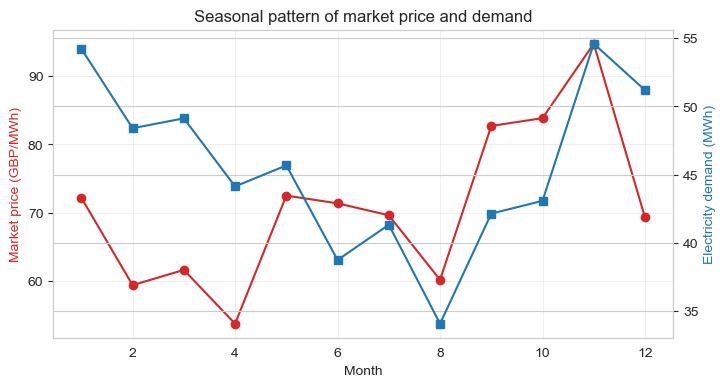

In [ ]:
# Seasonal average to see the trend between market price and the electricity demand

price["month"] = price["Timestamp"].dt.month

seasonal = (
    price.groupby("month")[["Market_Price_GBP", "Moray_Local_Demand"]]
    .mean()
)

fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(seasonal.index, seasonal["Market_Price_GBP"],
         marker="o", color="#d62728", label="Market price")
ax1.set_ylabel("Market price (GBP/MWh)", color="#d62728")

ax2 = ax1.twinx()
ax2.plot(seasonal.index, seasonal["Moray_Local_Demand"],
         marker="s", color="#1f77b4", label="Demand")
ax2.set_ylabel("Electricity demand (MWh)", color="#1f77b4")

ax1.set_xlabel("Month")
ax1.set_title("Seasonal pattern of market price and demand")
ax1.grid(alpha=0.3)

plt.show()

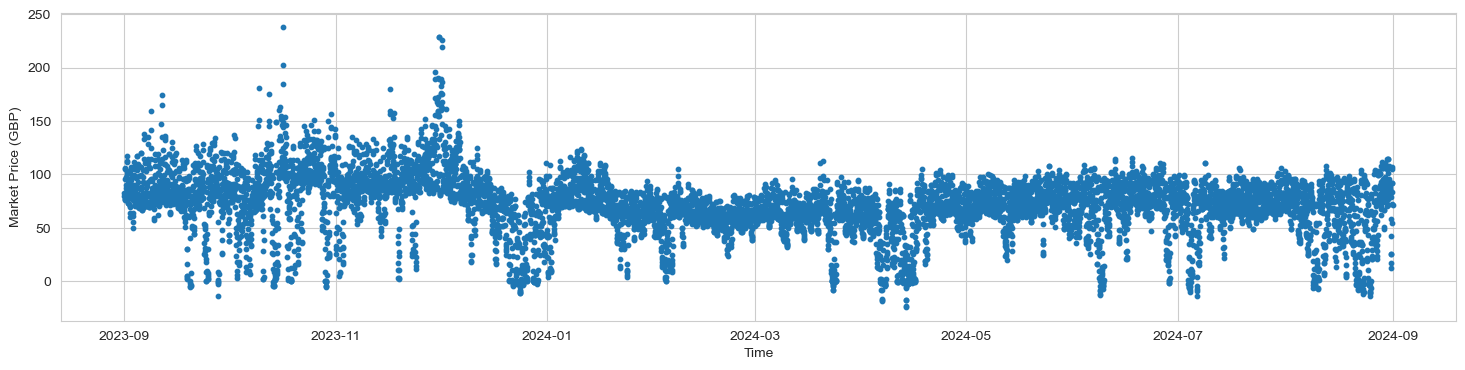

In [ ]:
# market price scatter plot

plt.figure(figsize=(18,4))
plt.scatter(price["Timestamp"], price["Market_Price_GBP"], s=10)
plt.xlabel("Time")
plt.ylabel("Market Price (GBP)")
plt.show()

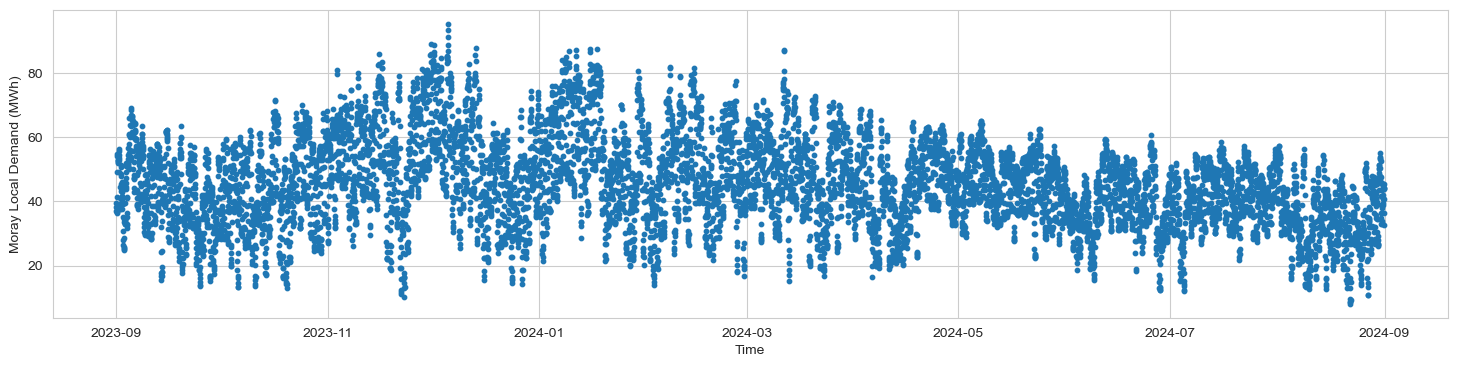

In [ ]:
# local demand scatter plot

plt.figure(figsize=(18,4))
plt.scatter(price["Timestamp"], price["Moray_Local_Demand"], s=10)
plt.xlabel("Time")
plt.ylabel("Moray Local Demand (MWh)")
plt.show()

In [ ]:
# load era5 data (meteorological data)

era5_1hr = pd.read_csv('HTW_era5_1hr.csv')
era5_1hr = era5_1hr
era5_1hr

In [ ]:
# Spatial aggregation (grid 1–15), which aggregates each parameter

def spatial_mean(era5_1hr, prefix):
    cols = [c for c in era5_1hr.columns if c.startswith(prefix)]
    return era5_1hr[cols].mean(axis=1)

def spatial_max(era5_1hr, prefix):
    cols = [c for c in era5_1hr.columns if c.startswith(prefix)]
    return era5_1hr[cols].max(axis=1)

# Temperature (°C)
era5_1hr["t2m_mean_C"] = spatial_mean(era5_1hr, "t2m_C")

# Surface pressure (Pa)
era5_1hr["surface_pressure_mean_Pa"] = spatial_mean(era5_1hr, "surface_pressure_Pa")

# Air density (kg/m3)
era5_1hr["air_density_mean"] = spatial_mean(era5_1hr, "air_density")

# Wind gust (m/s): mean + max
era5_1hr["wind_gust_mean_ms"] = spatial_mean(era5_1hr, "wind_gust_10m_ms")
era5_1hr["wind_gust_max_ms"]  = spatial_max(era5_1hr, "wind_gust_10m_ms")

In [ ]:
# drop old features that is not aggregated

grid_cols = [c for c in era5_1hr.columns if "_" in c and c[-1].isdigit()]
era5_agg = era5_1hr.drop(columns=grid_cols)
era5_agg.head()

In [ ]:
# convert timestamp to datetime type

era5_agg["time"] = pd.to_datetime(era5_agg["time"])
era5_agg["month"] = era5_agg["time"].dt.month

In [ ]:
# checking the general info of the era5 dataframe

era5_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   time                      8784 non-null   datetime64[ns, UTC]
 1   t2m_mean_C                8784 non-null   float64            
 2   surface_pressure_mean_Pa  8784 non-null   float64            
 3   air_density_mean          8784 non-null   float64            
 4   wind_gust_mean_ms         8784 non-null   float64            
 5   wind_gust_max_ms          8784 non-null   float64            
 6   month                     8784 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(1)
memory usage: 446.2 KB


In [ ]:
# checking the general info of the price dataframe

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           8784 non-null   datetime64[ns]
 1   SCOTLAND_DEMAND     8784 non-null   float64       
 2   Moray_Local_Demand  8784 non-null   float64       
 3   Market_Price_GBP    8784 non-null   float64       
 4   Hour                8784 non-null   int32         
 5   Demand_Cluster      8784 non-null   int64         
 6   Class               8784 non-null   int64         
 7   Days                8784 non-null   int64         
 8   Month               8784 non-null   int64         
 9   Day of The Week     8784 non-null   object        
 10  cluster             8784 non-null   int32         
 11  month               8784 non-null   int32         
 12  season              8784 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(3), int6

In [ ]:
# price: switch to UTC-aware
price["Timestamp"] = pd.to_datetime(price["Timestamp"], utc=True)

# era5: switch UTC-aware
era5_agg["time"] = pd.to_datetime(era5_agg["time"], utc=True)

# sort values
price = price.sort_values("Timestamp")
era5_agg = era5_agg.sort_values("time")

In [ ]:
df["month"] = df["Timestamp"].dt.month

seasonal = (
    df.groupby("month")
      .agg(
          Market_Price_min_GBP=("Market_Price_GBP", "min"),
          Wind_Gust_max_ms=("wind_gust_max_ms", "max")
      )
)

seasonal

,Market_Price_min_GBP,Wind_Gust_max_ms
month,,
1,3.78,33.357650
2,0.27,23.450226
3,-8.10,27.025589
4,-23.77,28.538376
5,20.12,18.291153
6,-13.08,20.048676
7,-13.84,20.491144
8,-13.64,21.915749
9,-13.62,27.615555


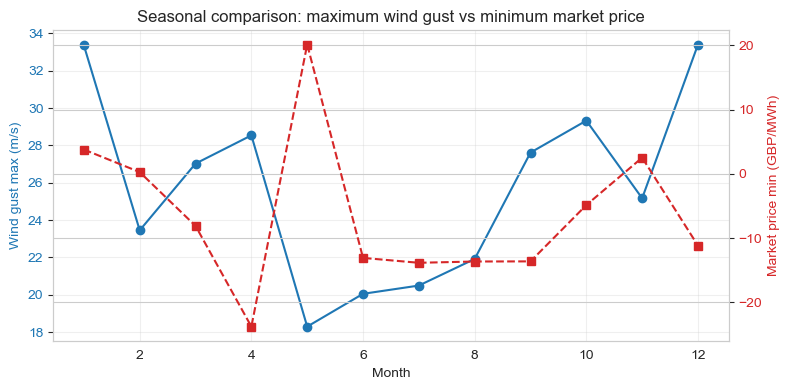

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,4))

# WIND GUST (left)
ax1.plot(
    seasonal.index,
    seasonal["Wind_Gust_max_ms"],
    marker="o",
    color="#1f77b4",
    label="Wind gust (max)"
)
ax1.set_ylabel("Wind gust max (m/s)", color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")

# MARKET PRICE (right)
ax2 = ax1.twinx()
ax2.plot(
    seasonal.index,
    seasonal["Market_Price_min_GBP"],
    marker="s",
    linestyle="--",
    color="#d62728",
    label="Market price (min)"
)
ax2.set_ylabel("Market price min (GBP/MWh)", color="#d62728")
ax2.tick_params(axis="y", labelcolor="#d62728")

ax1.set_xlabel("Month")
ax1.set_title("Seasonal comparison: maximum wind gust vs minimum market price")
ax1.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('wind vs price comparison.png', dpi=300)
plt.show()